# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Digits Dataset

In [2]:
digits = load_digits()

X = digits.data      # features
y = digits.target    # labels


In [3]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1797, 64)
Target shape: (1797,)


## Visualize Few Digit Images

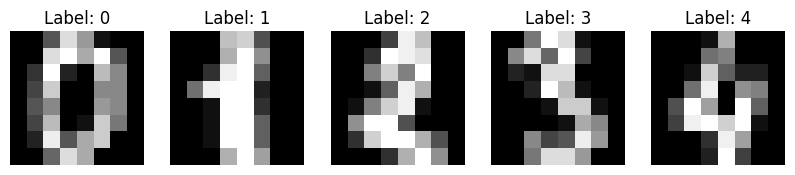

In [4]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()


# Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (1437, 64)
Testing samples: (360, 64)


# Feature Scaling

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train KNN Model (K = 3)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9694444444444444


# Multiple K Values

In [8]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc}")


K=3, Accuracy=0.9694444444444444
K=5, Accuracy=0.975
K=7, Accuracy=0.9722222222222222
K=9, Accuracy=0.9722222222222222


# Plot Accuracy vs K

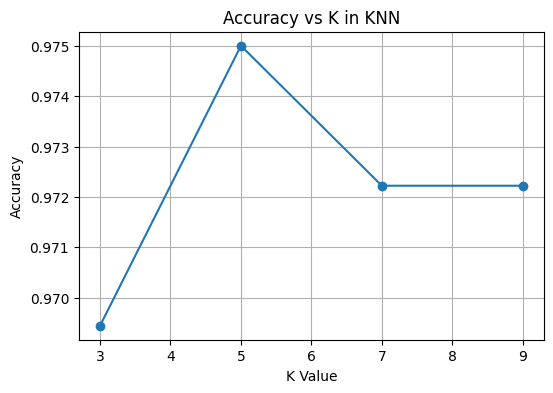

In [9]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid()
plt.show()


# Confusion Matrix

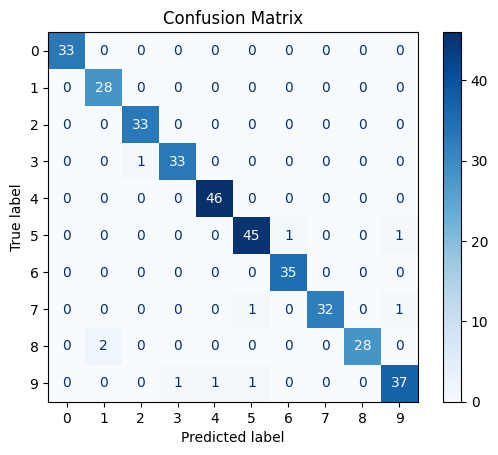

In [10]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 5 Test Images with Predictions

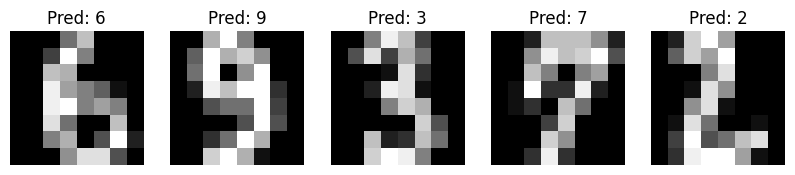

In [11]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.show()
